# Projeto 3 - Especificação de Histograma
Esse projeto tem o objetivo de falar sobre especificação de histograma
- Notebook desenvolvido por: Marcos Vinicius Silva - 202204192

## Conceito
De maneira simples a especificação de histograma é uma ferramenta para controlar a distribuição de tons/cores de uma imagem, fazendo com que ela siga o padrão de distribuição de outra imagem que você escolheu como modelo.
- Proporciona controle sobre a aparência final da imagem
---
## Aplicação
Para fazer a aplicação você deve seguir os seguintes passos
1. Calcular o histograma da imagem original
2. Calcular o histograma da imagem de referência
3. Normalizar os histogramas
4. Calcular as funções de distribuição cumulativa
5. Mapear a intensidade
6. Aplicar o mapeamento a imagem original

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Funções para calcular e equalizar histograma

In [2]:
def calcular_histograma(imagem):
    """Calcula o histograma de uma imagem."""
    histograma = np.zeros(256, dtype=int)
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            nivel_pixel = imagem[i, j]
            histograma[nivel_pixel] += 1
    return histograma

In [34]:
# Equalização de histograma
def equalizar(img):
    # Flatten da imagem para calcular o histograma
    flat = img.flatten()
    hist, bins = np.histogram(flat, bins=256, range=[0, 256])
    cdf = hist.cumsum()  # função densidade acumulada
    cdf_normalized = cdf * 255 / cdf[-1]  # normalização para 0-255

    # Aplicar a transformação
    equalized_img = np.interp(flat, bins[:-1], cdf_normalized).reshape(img.shape).astype(np.uint8)
    return equalized_img

# Imagem original

Text(0.5, 1.0, 'Histograma')

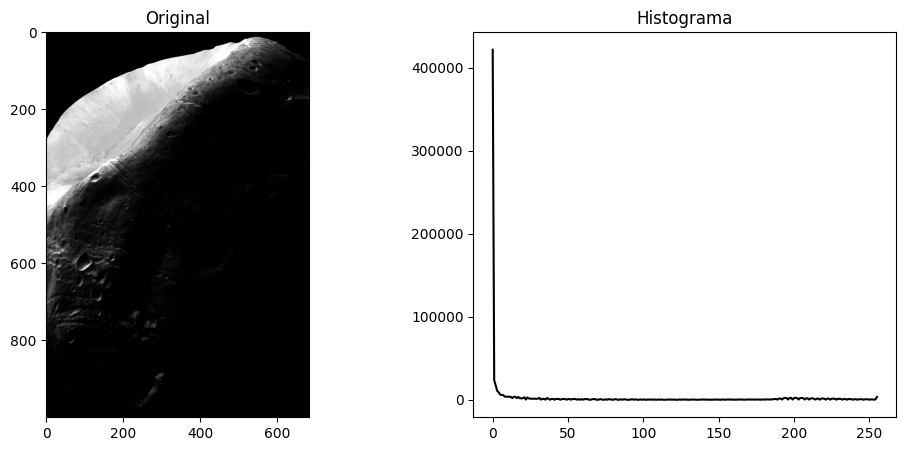

In [28]:
img1= cv2.imread('/content/Fig0323(a)(mars_moon_phobos).tif',cv2.IMREAD_GRAYSCALE)
h1 = calcular_histograma(img1)

f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].imshow(img1, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Original')

ax[1].plot(h1, color='k')
ax[1].set_title('Histograma')


Text(0.5, 1.0, 'Histograma')

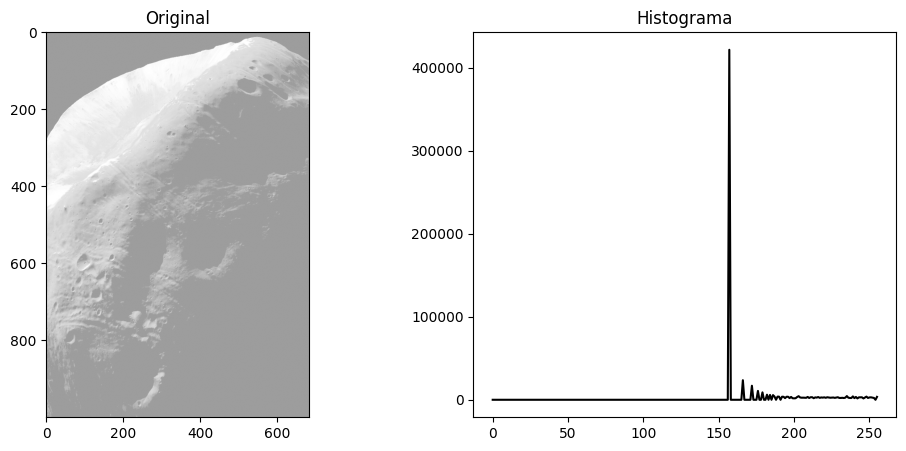

In [35]:
# Aplicar equalização
img1_eq = equalizar(img1)
h1_eq = calcular_histograma(img1_eq)

f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].imshow(img1_eq, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Original')

ax[1].plot(h1_eq, color='k')
ax[1].set_title('Histograma')



# Conclusão
Embora a equalização tenha melhorado a visualização de detalhes na imagem, a distribuição ainda está concentrada, não uniformizando o histograma corretamente
---
## Definindo o histograma desejado (manualmente)
1. Carregando a imagem
2. Criando histograma
3. Normalizando
4. Fazendo a CDF do histograma

In [46]:
# 1. Carregar imagem de entrada
img_eq = img1_eq

# 2. Criando histograma
hist_raw = np.concatenate([
    np.linspace(0, 70000, 25),
    np.linspace(70000, 13700, 10),
    np.linspace(13700, 13, 160),
    np.linspace(0, 12700, 15),
    np.linspace(12700, 0.0, 38)
])

# 3. Normalizando
hist_especificado = hist_raw / hist_raw.sum()

# 4. Fazendo a cdf do histograma
cdf_spec = np.cumsum(hist_especificado)
cdf_spec = (cdf_spec * 255).astype(np.uint8)



In [42]:
# 5. G⁻¹(s): função inversa
G_inv = np.zeros(256, dtype=np.uint8)
for s in range(256):
    idx = np.argmin(np.abs(cdf_spec - s))
    G_inv[s] = idx

In [43]:
# 6. Aplicar transformação à imagem equalizada
img_specified = G_inv[img_eq]

# 7. Histograma da imagem realçada (sem normalização)
hist_specified, _ = np.histogram(img_specified.flatten(), bins=256, range=[0, 256])

Text(0.5, 1.0, 'Histograma')

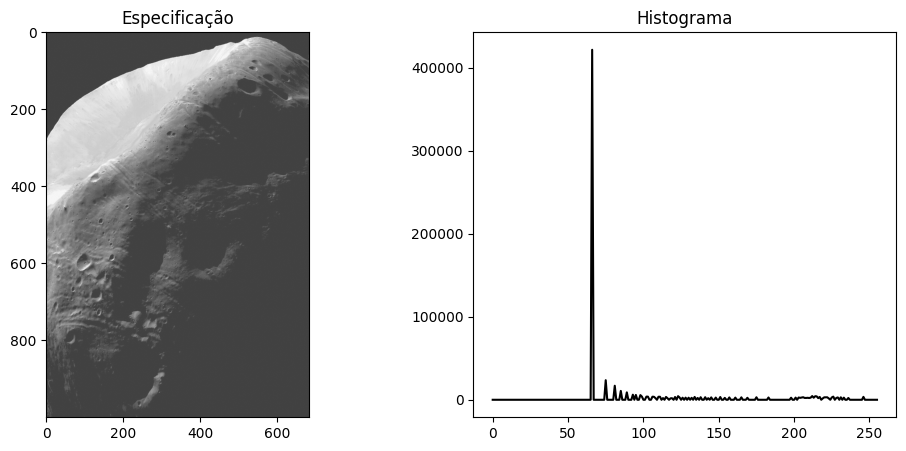

In [45]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].imshow(img_specified, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Especificação')

ax[1].plot(hist_specified, color='k')
ax[1].set_title('Histograma')


# Conclusão
A técnica de equalização de histograma tem como objetivo melhorar o contraste de uma imagem distribuindo de forma mais uniforme os níveis de intensidade.

Isso é alcançado por meio de uma transformação baseada na função de distribuição acumulada (CDF) da imagem original, que redistribui os valores de cinza para ocupar todo o intervalo disponível de forma mais balanceada.

O resultado é uma imagem com contraste aprimorado, facilitando a visualização de detalhes e sendo útil em aplicações de pré-processamento, análise visual e realce de imagens.

